In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
xls_data=pd.read_excel("./table.xlsx")

In [3]:
t2_dat=xls_data.loc[:,"# of turns":"Analytic"]

In [4]:
t3_dat=xls_data.loc[:,"# of turns.1":"Analytic.1"]

In [5]:
t4_dat=xls_data.loc[:,"# of turns.2":"Analytic.2"]

In [6]:
t2_dat=t2_dat.replace(np.nan,0)
t3_dat=t3_dat.replace(np.nan,0)
t4_dat=t4_dat.replace(np.nan,0)

In [7]:
def data_restore(dat):
    for col_name in dat.columns[:5]:
        temp=0
        for i in range(len(dat[col_name])):
            if (dat.loc[i,col_name]!=0):
                temp=dat.loc[i,col_name]
            if (dat.loc[i,col_name]==0):
                dat.loc[i,col_name]=temp
    return dat

In [8]:
t2_dat=data_restore(t2_dat)
t3_dat=data_restore(t3_dat)
t4_dat=data_restore(t4_dat)

In [9]:
total_dat_temp=np.vstack([t2_dat.values, t3_dat.values,t4_dat.values])

In [10]:
del_index=np.where(total_dat_temp[:,6]==0)[0]

In [11]:
total_dat_temp=pd.DataFrame(total_dat_temp,columns=t2_dat.columns)

In [12]:
total_dat=total_dat_temp.drop(del_index)

In [13]:
data=total_dat.values
data=np.delete(data, 100, axis=0)

In [14]:
log_dat_x=np.log(data[:,:6])

In [15]:
log_dat_y=np.log(data[:,7])

In [16]:
x_train=log_dat_x

In [17]:
max_x=np.max(x_train, axis=0)

In [18]:
x_train=x_train/ max_x

In [19]:
y_train=log_dat_y

In [20]:
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)

In [21]:
nb_epochs = 1000
model=nn.Linear(6,1)
val=0.001
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
for epoch in range(nb_epochs+1):

    prediction = torch.squeeze(model(x_train))
    regularity =  torch.norm(model.weight, p=1)
    loss = F.mse_loss(prediction, y_train)
    cost = loss + val*regularity
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
              epoch, nb_epochs, cost.item()
          ))

Epoch    0/1000 Cost: 3.325099
Epoch  100/1000 Cost: 0.473013
Epoch  200/1000 Cost: 0.338797
Epoch  300/1000 Cost: 0.281376
Epoch  400/1000 Cost: 0.251811
Epoch  500/1000 Cost: 0.236146
Epoch  600/1000 Cost: 0.227701
Epoch  700/1000 Cost: 0.223159
Epoch  800/1000 Cost: 0.220719
Epoch  900/1000 Cost: 0.219401
Epoch 1000/1000 Cost: 0.218689


In [22]:
x=np.squeeze(model(x_train).detach().numpy())

In [23]:
y=y_train.detach().numpy()

MSE: 0.21113817393779755
RMSE: 0.4594977409496129
Percentage error: 59.622597729785376 %


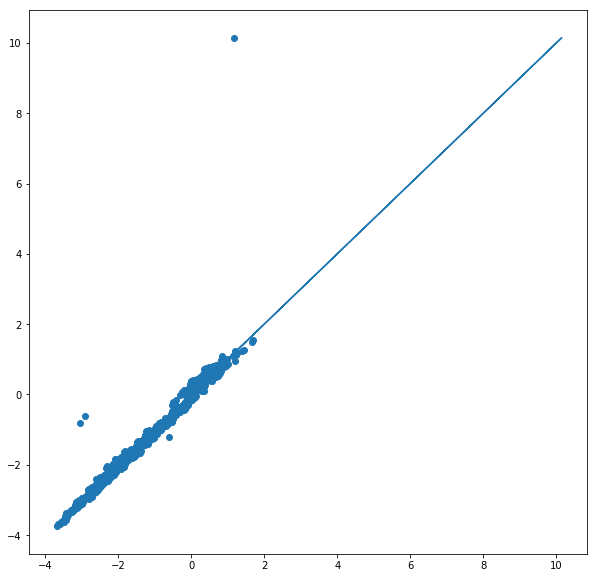

In [24]:
plt.figure(figsize=(10,10))
plt.plot(y,y)
plt.scatter(x, y)
plt.show
print('MSE:',loss.item())
print('RMSE:', np.sqrt(loss.item()))
print('Percentage error:', (np.exp(np.sqrt(cost.item()))-1)*100,'%')

In [25]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-1.6876, -0.5039, -0.1924, -0.0217, -0.7692, -4.3768]],
       requires_grad=True), Parameter containing:
tensor([4.0922], requires_grad=True)]


In [27]:
out_lier_index=np.nonzero(np.square(x-y)>0.5)
print(out_lier_index)

(array([ 10, 268, 412]),)


In [28]:
out_liers=np.zeros((3,8))

In [29]:
for i in range(3):
    out_liers[i]=data[out_lier_index[0][i],:]

In [30]:
pd.DataFrame(out_liers,columns=total_dat.columns)

,# of turns,permittivity(sur),LS/LW,SEP,permittivity(sub),OD,HFSS,Analytic
0,2.0,1.0,0.1,0.3,8.0,2.0,2.877300,25434.00000
1,3.0,30.0,0.3,0.6,8.0,32.0,0.032700,0.44497
2,4.0,30.0,0.3,0.6,2.2,32.0,0.050364,0.54049


In [31]:
data=np.delete(data, 412, axis=0)
data=np.delete(data, 268, axis=0)
data=np.delete(data, 10, axis=0)

In [32]:
log_dat_x=np.log(data[:,:6])
log_dat_y=np.log(data[:,7])
x_train=log_dat_x
max_x=np.max(x_train, axis=0)
x_train=x_train/ max_x
y_train=log_dat_y
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)

In [33]:
nb_epochs = 1000
model=nn.Linear(6,1)
val=0.001
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
for epoch in range(nb_epochs+1):

    prediction = torch.squeeze(model(x_train))
    regularity =  torch.norm(model.weight, p=1)
    loss = F.mse_loss(prediction, y_train)
    cost = loss + val*regularity
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
              epoch, nb_epochs, cost.item()
          ))

Epoch    0/1000 Cost: 4.724208
Epoch  100/1000 Cost: 0.315242
Epoch  200/1000 Cost: 0.162318
Epoch  300/1000 Cost: 0.095577
Epoch  400/1000 Cost: 0.061230
Epoch  500/1000 Cost: 0.043115
Epoch  600/1000 Cost: 0.033405
Epoch  700/1000 Cost: 0.028202
Epoch  800/1000 Cost: 0.025400
Epoch  900/1000 Cost: 0.023891
Epoch 1000/1000 Cost: 0.023078


MSE: 0.015642279759049416
RMSE: 0.1250690999369925
Percentage error: 16.406145339837288 %


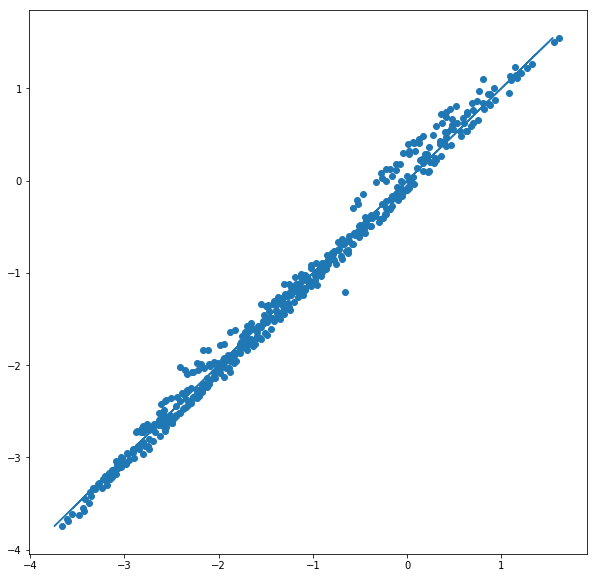

In [34]:
x=np.squeeze(model(x_train).detach().numpy())
y=y_train.detach().numpy()
plt.figure(figsize=(10,10))
plt.plot(y,y)
plt.scatter(x, y)
plt.show
print('MSE:',loss.item())
print('RMSE:', np.sqrt(loss.item()))
print('Percentage error:', (np.exp(np.sqrt(cost.item()))-1)*100,'%')

In [35]:
predicted=np.exp(x)
HFSS=data[:,6]
Analytic=data[:,7]

MSE: 0.015642279759049416
RMSE: 0.1250690999369925
Percentage error: 16.406145339837288 %
MSE_HFSS: 0.03649803018862795
RMSE_HFSS: 0.19104457644389686
Percentage error_HFSS: 17.2739773872769 %


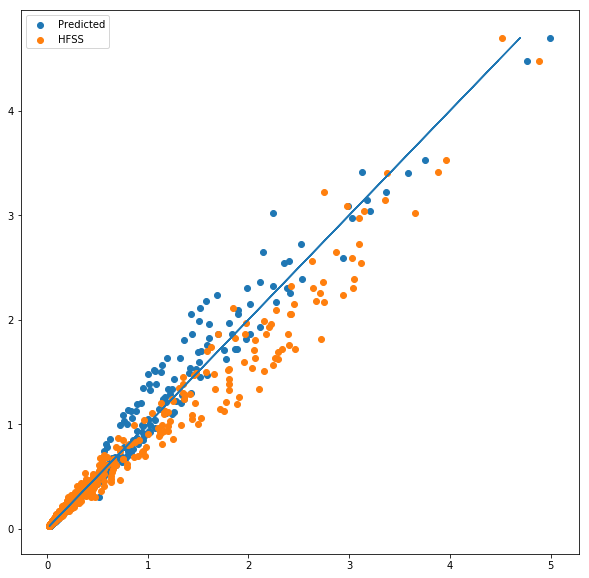

In [38]:
plt.figure(figsize=(10,10))
plt.plot(Analytic,Analytic)
plt.scatter(predicted, Analytic,label='Predicted')
plt.scatter(HFSS, Analytic,label='HFSS')
plt.legend()
plt.show
# print('MSE_Predicted:',np.linalg.norm(predicted-Analytic)**2/len(Analytic))
# print('RMSE_Predicted:', np.sqrt(np.linalg.norm(predicted-Analytic)**2/len(Analytic)))
# print('Percentage error_HFSS:', np.sum(np.abs(predicted-Analytic)/Analytic)/len(Analytic)*100,'%')
print('MSE:',loss.item())
print('RMSE:', np.sqrt(loss.item()))
print('Percentage error:', (np.exp(np.sqrt(cost.item()))-1)*100,'%')
print('MSE_HFSS:',np.linalg.norm(HFSS-Analytic)**2/len(Analytic))
print('RMSE_HFSS:', np.sqrt(np.linalg.norm(HFSS-Analytic)**2/len(Analytic)))
print('Percentage error_HFSS:', np.sum(np.abs(HFSS-Analytic)/Analytic)/len(Analytic)*100,'%')